In [43]:
%%time
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

import os
import matplotlib.pyplot as plt
from scipy import stats
import subprocess
from pathlib import Path, PureWindowsPath
import csv


from functools import partial
import pickle
import numpy as np
from io import StringIO

import datetime
import os
import sys

# if you have never used geopandas, first type: pip install geopandas
# will likely need to install descartes, too. Type: pip install descartes
import geopandas as gpd

from shapely.geometry import Point, Polygon, shape

CPU times: user 143 µs, sys: 275 µs, total: 418 µs
Wall time: 433 µs


In [8]:
#import the twitter data
#Note: change your data path to where the files live on your computer.
seoul=pd.read_csv(r'/Users/rivkabatlan/Documents/seoul.csv')
seoul.head()

,id,created_at,text,u_id,u_name,u_created_at,u_description,u_followers_count,type,c_country,u_screen_name,u_friends_count,location.lon,location.lat
0,226691344163278848,1.342882e+12,@PPKA2000 떨려요!!!!,584200454,YANG,1.337379e+12,NaN,1,ll,KOR,itzmiys,30,127.007085,37.570844
1,226691640738344960,1.342882e+12,영이랑 다크나이트라이즈 보러옴^^ (@ CGV 주안 w/ 3 others) http...,181161715,정상호얼빠,1.282396e+12,"No Baseball, No Life. 삼팬and스크팬. 어느 쪽도 포기못해. no...",256,ll,KOR,sinbi_hj,118,126.680474,37.465406
2,226691730391580673,1.342882e+12,@kaanaa91 かなさん、、、来週の土日飲も！笑っやんよんとこも！笑っ,621758634,리코りこRICO,1.340956e+12,国府津保育園・国府津小・国府津中・天理教校学園高・天理大国際学部外国語学科韓国・朝鮮語専攻3...,33,ll,KOR,peconiisan,50,127.721595,37.863531
3,226264709001797632,1.342781e+12,여친님이랑 고기 썰려고 왔음 (@ tgif건대점) http://t.co/82HdTv6L,123429597,Kyounggu,1.268707e+12,프로그래머2년차/C#/JAVA/ASP.NET/Oracle Forms/MSSQL/Or...,909,ll,KOR,Rusiaro,868,127.072197,37.540153
4,226264747048329216,1.342781e+12,"I'm at 발바닥공원 (도봉구, 서울특별시) http://t.co/0VvowlwQ",63569281,MissBini,1.249600e+12,"서울 거주, 음악, 책, 카메라 등 좋아하는 거 다양. 잡다한 생각에 싸여 하루하루...",1127,ll,KOR,waitwai,964,127.032208,37.659686


In [11]:
seoul.shape

#output means there are 12,038,489 tweets in the table and 14 columns

(12038489, 14)

In [12]:
seoul.dtypes

#output tells you what form the cells are in
#object= mixed type

id                     int64
created_at           float64
text                  object
u_id                   int64
u_name                object
u_created_at         float64
u_description         object
u_followers_count      int64
type                  object
c_country             object
u_screen_name         object
u_friends_count        int64
location.lon         float64
location.lat         float64
dtype: object

In [13]:
#ACTION: filter for key word "핫플" in all the tweets' text

In [14]:
#first: check if there are any null values, bc we can't use those
seoul['text'].isnull().sum()

1

In [15]:
#we will drop rows that have no value under the text column
seoul=seoul.dropna(subset=['text'])

#lets check again to make sure that we did it
seoul['text'].isnull().sum()

0

In [16]:
#how to *filter* rows/columns generally:

#use a boolean series, like below:
    # filter = df['column 1'] == 'text to filter for'
    # will pick out all the rows where it's column 1 matches **exactly** 'text to filter for'

#df[filter]
#will give you a new data frame based on what you filtered for


#here's one example. The resulting dataframe will only include tweets by the user 'YANG'
filter1= seoul['u_name']=='YANG'
filter_test= seoul[filter1]

filter_test

,id,created_at,text,u_id,u_name,u_created_at,u_description,u_followers_count,type,c_country,u_screen_name,u_friends_count,location.lon,location.lat
0,226691344163278848,1.342882e+12,@PPKA2000 떨려요!!!!,584200454,YANG,1.337379e+12,NaN,1,ll,KOR,itzmiys,30,127.007085,37.570844
35200,226328081428795392,1.342796e+12,동대문 메가박스 클럽 open @itzmeys @BeeeestDJ @Joker891...,584200454,YANG,1.337379e+12,NaN,1,ll,KOR,itzmiys,30,127.004882,37.566041
37071,226281034956812288,1.342785e+12,@itzmeys @BeeeestDJ @Joker891219 @beastdw @B2s...,584200454,YANG,1.337379e+12,NaN,1,ll,KOR,itzmiys,30,127.045691,37.604818
1611697,303355741320929280,1.361161e+12,I just ousted Young Soo J. as the mayor of The...,326533652,YANG,1.309400e+12,실시간 모바일 설문조사 오픈서베이. 신기하다.,66,ll,KOR,heesplendid,60,127.031036,37.493373
2236868,318974416744759296,1.364884e+12,@__conceive 내 주제에 공부는..프르으으으,1290776994,YANG,1.364026e+12,ㅇㅈㅆ ㅅㅇㅇㄷ ^♥^,22,ll,KOR,ae_sz,26,126.741525,37.508688
2242641,318979260746444800,1.364886e+12,@929520 ..메에..,1290776994,YANG,1.364026e+12,현상수배 양 주인님 찾습니다,22,ll,KOR,ae_sz,27,126.741273,37.508936
2260250,318975263792848898,1.364885e+12,양 주인님 어디계시나.. @RThongbo_b @RT_NamShin_ @RT_pri...,1290776994,YANG,1.364026e+12,ㅇㅈㅆ ㅅㅇㅇㄷ ^♥^,22,ll,KOR,ae_sz,26,126.739915,37.509360
2260255,318978800723574784,1.364885e+12,@TL_EXOhyun ㅌㅌㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅌㅌㅌㅋㅋㅋㅋㅋㅋㅋㅋ,1290776994,YANG,1.364026e+12,현상수배 양 주인님 찾습니다,22,ll,KOR,ae_sz,27,126.743056,37.505016
2300162,318974675847888897,1.364884e+12,3 ; 33 @_O_v_e_r__ ..플일,1290776994,YANG,1.364026e+12,ㅇㅈㅆ ㅅㅇㅇㄷ ^♥^,22,ll,KOR,ae_sz,26,126.741034,37.509506
2300164,318975159769907201,1.364885e+12,메에에에에에에에 @RThongbo_b @RT_NamShin_ @RT_prince_b...,1290776994,YANG,1.364026e+12,ㅇㅈㅆ ㅅㅇㅇㄷ ^♥^,22,ll,KOR,ae_sz,26,126.741528,37.508687


In [17]:
#shortcut for filtering: integrate the boolean into the one command

f_test= seoul[seoul['u_name']=='YANG']
f_test

#same result as above, just shorter text

,id,created_at,text,u_id,u_name,u_created_at,u_description,u_followers_count,type,c_country,u_screen_name,u_friends_count,location.lon,location.lat
0,226691344163278848,1.342882e+12,@PPKA2000 떨려요!!!!,584200454,YANG,1.337379e+12,NaN,1,ll,KOR,itzmiys,30,127.007085,37.570844
35200,226328081428795392,1.342796e+12,동대문 메가박스 클럽 open @itzmeys @BeeeestDJ @Joker891...,584200454,YANG,1.337379e+12,NaN,1,ll,KOR,itzmiys,30,127.004882,37.566041
37071,226281034956812288,1.342785e+12,@itzmeys @BeeeestDJ @Joker891219 @beastdw @B2s...,584200454,YANG,1.337379e+12,NaN,1,ll,KOR,itzmiys,30,127.045691,37.604818
1611697,303355741320929280,1.361161e+12,I just ousted Young Soo J. as the mayor of The...,326533652,YANG,1.309400e+12,실시간 모바일 설문조사 오픈서베이. 신기하다.,66,ll,KOR,heesplendid,60,127.031036,37.493373
2236868,318974416744759296,1.364884e+12,@__conceive 내 주제에 공부는..프르으으으,1290776994,YANG,1.364026e+12,ㅇㅈㅆ ㅅㅇㅇㄷ ^♥^,22,ll,KOR,ae_sz,26,126.741525,37.508688
2242641,318979260746444800,1.364886e+12,@929520 ..메에..,1290776994,YANG,1.364026e+12,현상수배 양 주인님 찾습니다,22,ll,KOR,ae_sz,27,126.741273,37.508936
2260250,318975263792848898,1.364885e+12,양 주인님 어디계시나.. @RThongbo_b @RT_NamShin_ @RT_pri...,1290776994,YANG,1.364026e+12,ㅇㅈㅆ ㅅㅇㅇㄷ ^♥^,22,ll,KOR,ae_sz,26,126.739915,37.509360
2260255,318978800723574784,1.364885e+12,@TL_EXOhyun ㅌㅌㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅌㅌㅌㅋㅋㅋㅋㅋㅋㅋㅋ,1290776994,YANG,1.364026e+12,현상수배 양 주인님 찾습니다,22,ll,KOR,ae_sz,27,126.743056,37.505016
2300162,318974675847888897,1.364884e+12,3 ; 33 @_O_v_e_r__ ..플일,1290776994,YANG,1.364026e+12,ㅇㅈㅆ ㅅㅇㅇㄷ ^♥^,22,ll,KOR,ae_sz,26,126.741034,37.509506
2300164,318975159769907201,1.364885e+12,메에에에에에에에 @RThongbo_b @RT_NamShin_ @RT_prince_b...,1290776994,YANG,1.364026e+12,ㅇㅈㅆ ㅅㅇㅇㄷ ^♥^,22,ll,KOR,ae_sz,26,126.741528,37.508687


In [18]:
#For this project, though, we want to filter for cells that **CONTAIN** the desired text in the selected column
#instead of using a == boolean, use the following command: .str.contains['desired text']

#ACTION: filtering for key word 1 "핫플" in all the tweets' text

first_word= seoul[seoul['text'].str.contains("핫플")]
first_word

,id,created_at,text,u_id,u_name,u_created_at,u_description,u_followers_count,type,c_country,u_screen_name,u_friends_count,location.lon,location.lat
33880,226155399210991616,1.342755e+12,전곡리 핫플레이스래 ㅋㅋ (@ 보정가든) http://t.co/hYqJYCd6,64670707,JJ,1.249983e+12,코알라+결벽증+예민+촉,43,ll,KOR,j150010,67,127.057581,38.014901
186732,240774410322206720,1.346240e+12,수요일의 핫플레이스~ 양평엘피바 문여는 날입니다. 선착순 입장이니까 서둘러 켜주세요...,544209188,장기하의 대단한 라디오,1.333454e+12,NaN,2602,ll,KOR,greatradi5,1892,126.872947,37.530074
193796,233083876883456001,1.344407e+12,뉴 핫플레이스!! @ Assouline http://t.co/KSsaIX3H,491164544,ViaTORY,1.329127e+12,ViaTORY _ Fashion Communicator,162,ll,KOR,ViaTORY,327,127.036499,37.523499
211615,231384249981362176,1.344001e+12,효자동의 핫플! 퍼플릭. 자리가 없어 대기 할 정도네~ㅋ http://t.co/9N...,132347018,kangeunsoo,1.271119e+12,사는게 예술인 디자이너,477,ll,KOR,eunsoo1126,424,126.970830,37.581874
257278,244093739813969921,1.347031e+12,@hhyyoo_ 진짜가고싶어ㅠㅠ춘천이나의핫플레이스,141446213,강다혜,1.273290e+12,NaN,11,ll,KOR,KangDahye,12,126.832761,37.555787
309052,251220597567270912,1.348731e+12,"핫플레이스 (@ 명동 (明洞, Myeongdong)) http://t.co/qoc4...",210075176,인생속도가 점점 LTE,1.288449e+12,que sera sera,89,ll,KOR,wing1na,135,126.983457,37.563664
324063,243892303222161408,1.346983e+12,@oddsandsods_ 아 맞아요! 멘션드리고 나서 퍼뜩 생각났다능. 거기 아는데...,215272997,Kate Han,1.289655e+12,NaN,423,ll,KOR,KateHan90,126,126.924145,37.526584
346172,247239382027870208,1.347781e+12,@hwa8761 뱅기뜨겟지? 젭알...ㅎㅎㅎㅎ\n알앗어이 핫플레이스 알아놔 미션이다 !,297420481,김연아,1.305208e+12,A형 같은 O형. 가양동 거주.입석으로 세계여행중^_^,7,ll,KOR,yeonakim,14,126.816532,37.567787
392239,249400315558895616,1.348297e+12,신포동 핫플레이스 (@ 원조 신포닭강정) [pic]: http://t.co/0rQU...,187442610,현쓰 ☻,1.283756e+12,무한도전 / 잡지식 / 꽃무늬 / 목소리덕후 / 돼지국밥 / 충동구매 / 행동하는 ...,61,ll,KOR,hyunnss,111,126.628174,37.471584
416709,248371013555982338,1.348051e+12,핫플레이스 ㅠㅡㅠ 너무 좋아.. 수원역에.이런곳이 있었다닝 ㅠㅡㅠ,168715081,Beak Seul Ki,1.279642e+12,헿,126,ll,KOR,qortmfrl,326,127.001922,37.265558


In [19]:
first_word.shape

#there are 489 tweets in the data set w/ "핫플" in the text

(489, 14)

In [20]:
#you can filter the dataset for all of the keywords *at once* by subsetting w/ multiple conditions

#it's the most organized to make formulas:

word_1=seoul['text'].str.contains("핫플")
word_2=seoul['text'].str.contains('핫플레이스')
word_3=seoul['text'].str.contains('서울핫플레이스')
word_4=seoul['text'].str.contains('서울맛집')
word_5=seoul['text'].str.contains('서울맛집투어')
word_6=seoul['text'].str.contains('맛집')
word_7=seoul['text'].str.contains('와인')

#now use an 'or' operator w/ the '|' key
    #that's because you want tweets that contain word 1 OR word 2 OR word 3 etc...

all_filters= word_1|word_2|word_3|word_4|word_5|word_6|word_7
filtered_seoul= seoul[all_filters]
filtered_seoul.head()

,id,created_at,text,u_id,u_name,u_created_at,u_description,u_followers_count,type,c_country,u_screen_name,u_friends_count,location.lon,location.lat
1110,227553058614284289,1.343088e+12,"며칠 전 퇴근길 선택의 자유에 대해 적었었는데, 출근길 선택의 자유 역시 대단히 매...",173419326,Wook-wan Ha 하욱완,1.280665e+12,"괜찮은 책 두어권, 내 오랜 스쿠터, 가다가 기름 넣고 편의점 캔커피 한 잔 할 정...",12,ll,KOR,limeraa,20,126.981713,37.574012
1476,227418364207828992,1.343056e+12,이대에 가면 와인샤베트가 있다\n배부른 이대 저녁 거리를 \n깔끔하게 쏘다니기에 딱...,614442081,박은영,1.340289e+12,NaN,5,ll,KOR,peh337peh,6,126.854427,37.479367
2270,227605153837096960,1.343100e+12,여기도 맛집! (@ 두레국수) http://t.co/j42lyBJS,221033694,스투시,1.291044e+12,*Poreka MarketingTeam PostVisual(SocialCommuni...,2793,ll,KOR,stussygo,950,127.043160,37.504690
3593,226258614409646080,1.342779e+12,칵테일이 땡겨서 미도리나 블루퀴라소를 사려고 봤더니 파는데가 안보인다. (오픈마켓에...,188203473,장미의신부,1.283920e+12,벌컥벌컥~!!,71,ll,KOR,ksj450,33,127.015599,37.573805
4333,226700654217928704,1.342885e+12,그야말로 칼로리폭탄. 주문은 뷘마마께서 하셨는데 왜 제가 절반이상 마셔야하는지? (...,132813940,SHIN희도,1.271230e+12,In pursuit of happyness // \r\nFuture(s)+Optio...,2425,ll,KOR,GlisterWay,1499,126.951893,37.548014


In [21]:
filtered_seoul.shape

#there are 19,938 tweets containing the key words

(19938, 14)

In [22]:
#ACTION: filter tweets to only those tweeted in the key neighborhoods

In [25]:
#first, let's import the South Korea shape file

skorea_shape= gpd.read_file(r'/Users/rivkabatlan/Documents/sk-municipalities-2018-geo.json')
skorea_shape

,name,base_year,name_eng,code,geometry
0,사직동,2018,Sajik-dong,1101053,"MULTIPOLYGON (((126.96894 37.57815, 126.96965 ..."
1,삼청동,2018,Samcheong-dong,1101054,"MULTIPOLYGON (((126.97714 37.59768, 126.97874 ..."
2,부암동,2018,Buam-dong,1101055,"MULTIPOLYGON (((126.96173 37.60714, 126.96267 ..."
3,평창동,2018,Pyeongchang-dong,1101056,"MULTIPOLYGON (((126.96267 37.60567, 126.96173 ..."
4,무악동,2018,Muak-dong,1101057,"MULTIPOLYGON (((126.95975 37.58001, 126.96111 ..."
...,...,...,...,...,...
3499,서홍동,2018,Seohong-dong,3902058,"MULTIPOLYGON (((126.53012 33.31806, 126.53200 ..."
3500,대륜동,2018,Daeryundong,3902059,"MULTIPOLYGON (((126.51613 33.22031, 126.51626 ..."
3501,대천동,2018,Daecheon-dong,3902060,"MULTIPOLYGON (((126.51429 33.36122, 126.51967 ..."
3502,중문동,2018,Jungmun-dong,3902061,"MULTIPOLYGON (((126.46566 33.36000, 126.46684 ..."


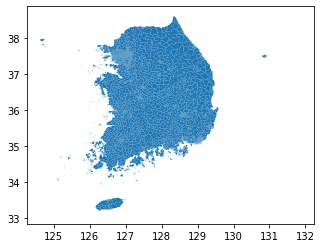

In [31]:
#let's see what it looks like on a map
skorea_shape.plot()

In [33]:
#in order to spatially join the tweets to the shape file,
#the tweets need to be a gdf
#let's check if it is already

type (filtered_seoul)

pandas.core.frame.DataFrame

In [50]:
#the dataset is currently a dataframe

#let's turn the df into a gdf with this custom function 
#(function created by previous UDP teams)

def geometrize_tweets(df):
    """
    Convert DataFrame of tweets into GeoDataFrames based on lat/lon coords.
    Parameters
    ----------
    data : pd.DataFrame
    Must contain columns 'lat' and 'lon' containing lat/lon coordinates
    Returns
    -------
    pd.geodataframe.GeoDataFrame
    """
    # Create a shapely.geometry.Point for each tweet
    geometry = [Point(xy) for xy in zip(df['location.lon'], df['location.lat'])]
    crs = {'init':'epsg:4326'}
    # Convert to GeoDataFrame, where each tweet's geometry is assigned to the lat/lon coords
    return gpd.GeoDataFrame(df, crs=crs, geometry=geometry)

filtered_geometrized= geometrize_tweets(filtered_seoul)

#now let's check the tweets' data type again
type (filtered_geometrized)
#you can also tell that the tweets are in the right format bc their geometries are all "POINT"

geopandas.geodataframe.GeoDataFrame

In [54]:
#spatially join the geometrized tweets w/ the south korea shape file
joined = gpd.sjoin(filtered_geometrized, skorea_shape, how='left', op='intersects')
joined

/opt/anaconda3/lib/python3.7/site-packages/geopandas/tools/sjoin.py:61: UserWarning: CRS of frames being joined does not match!(+init=epsg:4326 +type=crs != epsg:4326)
  "(%s != %s)" % (left_df.crs, right_df.crs)


,id,created_at,text,u_id,u_name,u_created_at,u_description,u_followers_count,type,c_country,u_screen_name,u_friends_count,location.lon,location.lat,geometry,index_right,name,base_year,name_eng,code
1110,227553058614284289,1.343088e+12,"며칠 전 퇴근길 선택의 자유에 대해 적었었는데, 출근길 선택의 자유 역시 대단히 매...",173419326,Wook-wan Ha 하욱완,1.280665e+12,"괜찮은 책 두어권, 내 오랜 스쿠터, 가다가 기름 넣고 편의점 캔커피 한 잔 할 정...",12,ll,KOR,limeraa,20,126.981713,37.574012,POINT (126.98171 37.57401),7.0,종로1·2·3·4가동,2018,Jongno1·2·3·4Gadong,1101061
1476,227418364207828992,1.343056e+12,이대에 가면 와인샤베트가 있다\n배부른 이대 저녁 거리를 \n깔끔하게 쏘다니기에 딱...,614442081,박은영,1.340289e+12,NaN,5,ll,KOR,peh337peh,6,126.854427,37.479367,POINT (126.85443 37.47937),1344.0,광명4동,2018,Gwangmyeong 4(sa)-dong,3106054
2270,227605153837096960,1.343100e+12,여기도 맛집! (@ 두레국수) http://t.co/j42lyBJS,221033694,스투시,1.291044e+12,*Poreka MarketingTeam PostVisual(SocialCommuni...,2793,ll,KOR,stussygo,950,127.043160,37.504690,POINT (127.04316 37.50469),364.0,역삼1동,2018,Yeoksam 1(il)-dong,1123064
3593,226258614409646080,1.342779e+12,칵테일이 땡겨서 미도리나 블루퀴라소를 사려고 봤더니 파는데가 안보인다. (오픈마켓에...,188203473,장미의신부,1.283920e+12,벌컥벌컥~!!,71,ll,KOR,ksj450,33,127.015599,37.573805,POINT (127.01560 37.57381),10.0,창신1동,2018,Changsin 1(il)-dong,1101067
4333,226700654217928704,1.342885e+12,그야말로 칼로리폭탄. 주문은 뷘마마께서 하셨는데 왜 제가 절반이상 마셔야하는지? (...,132813940,SHIN희도,1.271230e+12,In pursuit of happyness // \r\nFuture(s)+Optio...,2425,ll,KOR,GlisterWay,1499,126.951893,37.548014,POINT (126.95189 37.54801),221.0,아현동,2018,Ahyeon-dong,1114078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12038055,788607441864892416,1.476854e+12,#고기 는 역시 #두툼 해야 #옳다 \n#맛찬들왕소금구이 #부천중동 점.\n#국내산...,69320921,SOL2DADDY,1.251387e+12,F.C ANYANG/A.S.U RED/CRIMSON TIDE/4대째 안양토박이/#k...,4670,llp,KOR,flunker_z,1341,126.761157,37.503084,POINT (126.76116 37.50308),1320.0,중1동,2018,Jung 1(il)-dong,3105066
12038176,782777504352264192,1.475464e+12,짜장면~~~\n#홍콩반점 #금정역맛집 @ Geumjeong Station https...,514221038,Jo Jeong Tae,1.330859e+12,NaN,30,llp,KOR,whwjxxo1357,153,126.943333,37.372500,POINT (126.94333 37.37250),1510.0,금정동,2018,Geumjeong-dong,3116056
12038187,782687049501577216,1.475442e+12,예름찡이랑 화해의자리\n칭구야 우리 고만좀 싸우자~~~ㅋㅋ😆\n.\n.\n#한소영 ...,172341855,soyoung Han(한소영),1.280411e+12,"한소영입니당♥ Korea's actor_Han so young..매운음식/연극,뮤지...",2701,llp,KOR,sso0101,29,127.037861,37.526739,POINT (127.03786 37.52674),375.0,압구정동,2018,Apgujeong-dong,1123077
12038427,786028982705741824,1.476239e+12,#한국 #서울 #마포 #먹스타그램 #맛스타그램 #닭도리탕 #닭찜 #부추전 #맛집 #...,142503681,김규현,1.273543e+12,"사람과 사진과 책을 좋아하는 한톨이입니다.사랑, 자유, 평등, 신뢰, 성실이라는 단...",214,llp,KOR,Chekyubary,288,126.947624,37.539441,POINT (126.94762 37.53944),218.0,도화동,2018,Dohwa-dong,1114075


In [56]:
#you asked for a dataset w/ 1) tweets including the keywords and 2)in the selected neighborhoods

#now, I'll filter the joined dataset so it only includes those in the selected neighborhoods


#again, you can filter the dataset for all of the neighborhoods *at once* by subsetting w/ multiple conditions
#it's the most organized to make formulas:

neighborhood_1=joined['name_eng']=='Yeonnam-dong'
neighborhood_2=joined['name_eng']=='Itaewon-dong'
neighborhood_3=joined['name_eng']=='Seongsu-dong 1(il)-ga'
neighborhood_4=joined['name_eng']=='Seongsu-dong 2(i)-ga'
neighborhood_5=joined['name_eng']=='Seogyo-dong'

#now use an 'or' operator w/ the '|' key
    #that's because you want tweets that contain 'hood1 OR 'hood2 OR 'hood3 etc...

all_filters= neighborhood_1|neighborhood_2|neighborhood_3|neighborhood_4|neighborhood_5
selected_tweets= joined[all_filters]
selected_tweets.head()

,id,created_at,text,u_id,u_name,u_created_at,u_description,u_followers_count,type,c_country,u_screen_name,u_friends_count,location.lon,location.lat,geometry,index_right,name,base_year,name_eng,code
42530,225761230676164608,1.342661e+12,완소 와인상자 :) 메이드닌칠레! @ 도미토리 (Domitory) http://...,149046086,쵸사장,1.275034e+12,"합정역 여행정보카페 도미토리\r\n\r\n하나투어 상품, 항공권, 숙소예약, 패스 ...",948,ll,KOR,domitory_,652,126.917378,37.551450,POINT (126.91738 37.55145),210.0,서교동,2018,Seogyo-dong,1114066
84651,232803745891774464,1.344340e+12,와인부페 헤헤 (@ 상상마당 카페) http://t.co/NK76BaGC,137919782,Yooooo,1.272427e+12,의지박약아.망상가.자유로운영혼\n♥ & ☮,294,ll,KOR,_maniacc,284,126.921052,37.550970,POINT (126.92105 37.55097),210.0,서교동,2018,Seogyo-dong,1114066
84863,236770676441235457,1.345286e+12,Gals' out night- 이제 와인 고고! (@ Little Terrace) ...,164828564,Hee Jin Seo,1.278712e+12,Shining/ \nRiver's wife/ \nGaon's Mom/ \nToefl...,139,ll,KOR,shining0718,95,126.922332,37.551940,POINT (126.92233 37.55194),210.0,서교동,2018,Seogyo-dong,1114066
102685,239704183886979072,1.345985e+12,오우 태우오빠의 추천맛집. 좋은 걸? (@ 오징어와 낙지가 통통 w/ 2 other...,48865816,랑쑈,1.245455e+12,노래하는 사람/B2Lady 리더/블랙티 출신/홍대앞/주성치/음주가무/월드오브워크래프...,1755,ll,KOR,Rangshow,421,126.923315,37.554301,POINT (126.92331 37.55430),210.0,서교동,2018,Seogyo-dong,1114066
138449,239318924603318272,1.345893e+12,신나는섬 공연보러 옴!!! 9시 까지 기다려야함ㅡㅡ;; 와인한잔 비우는 중~~~ h...,240589057,서효순,1.295511e+12,"사회복지사 상식이 통하는 세상, 사람을 귀하게 여기는 세상이었으면 좋겠습니다. 우리...",431,ll,KOR,ppoyangee,291,126.931963,37.554832,POINT (126.93196 37.55483),210.0,서교동,2018,Seogyo-dong,1114066


In [59]:
selected_tweets.shape
#there are 1186 tweets using the keywords in the designated neighborhoods

(1186, 20)

In [67]:
#I exported the output as a CSV using the following: 

selected_tweets.to_csv('selected_tweets.csv.gz')